In [1]:
import pandas as pd
import numpy as np

In [2]:
link = "https://docs.google.com/spreadsheets/d/1kuhnJpk8VA8NYVnGdyXuIya1jYanWgpL/edit?usp=sharing&ouid=118414263460752774046&rtpof=true&sd=true"

df = pd.read_html(link)[0]
df = df.dropna(axis=1, how='all')

df.columns = df.iloc[0]  
df = df[1:] 
df = df.drop(1, axis=1)
df = df.dropna(how='all')

df.head()

,regions,2011,2012.0,2013.0,2015,2017,2019,2021
1,Autonomous Republic of Crimea,1.56,1.68,1.66,_,_,_,_
2,Vinnytsia region,1.53,1.59,1.53,1.5,1.36,1.2,1.14
3,Volyn region,1.81,1.92,1.86,1.74,1.62,1.48,1.45
4,Dnipropetrovsk region,1.44,1.52,1.51,1.48,1.29,1.11,1.03
5,Donetsk region,1.27,1.34,1.32,_,_,_,_


In [3]:
headers = []

for column in df.columns:
    if column in [2012.0, 2013.0]:
        column = str(int(column))

    headers.append(column)

print(headers)

['regions', '2011', '2012', '2013', '2015', '2017', '2019', '2021']


In [4]:
df.columns = headers
df.head()

,regions,2011,2012,2013,2015,2017,2019,2021
1,Autonomous Republic of Crimea,1.56,1.68,1.66,_,_,_,_
2,Vinnytsia region,1.53,1.59,1.53,1.5,1.36,1.2,1.14
3,Volyn region,1.81,1.92,1.86,1.74,1.62,1.48,1.45
4,Dnipropetrovsk region,1.44,1.52,1.51,1.48,1.29,1.11,1.03
5,Donetsk region,1.27,1.34,1.32,_,_,_,_


In [5]:
shape = df.shape
print(f"shape = {shape}")

shape = (27, 8)


In [6]:
df = df.replace(to_replace={"_": np.NaN})

df.head(n=shape[0])

,regions,2011,2012,2013,2015,2017,2019,2021
1,Autonomous Republic of Crimea,1.56,1.68,1.66,NaN,NaN,NaN,NaN
2,Vinnytsia region,1.53,1.59,1.53,1.5,1.36,1.2,1.14
3,Volyn region,1.81,1.92,1.86,1.74,1.62,1.48,1.45
4,Dnipropetrovsk region,1.44,1.52,1.51,1.48,1.29,1.11,1.03
5,Donetsk region,1.27,1.34,1.32,NaN,NaN,NaN,NaN
6,Fatigue region,1.65,1.71,1.68,1.6,1.42,1.23,1.14
7,Transcarpathian region,1.87,1.95,1.93,1.82,1.64,1.52,NaN
8,Zaporizhia region,1.37,1.46,1.43,1.39,1.25,1.09,NaN
9,Ivano-Frankivsk region,1.55,1.63,1.60,1.54,1.36,1.28,1.15
10,Kyiv region,1.58,1.67,1.64,1.65,1.41,2.15,1.07


In [7]:
types = df.dtypes
print(f"types = {types}")

types = regions     object
2011        object
2012       float64
2013       float64
2015        object
2017        object
2019        object
2021        object
dtype: object


In [8]:

for i in range(1, shape[1]):
    df[df.columns[i]] = pd.to_numeric(df[df.columns[i]])

df.dtypes

regions     object
2011       float64
2012       float64
2013       float64
2015       float64
2017       float64
2019       float64
2021       float64
dtype: object

In [9]:
df.isnull().sum()

regions     0
2011        1
2012        0
2013        0
2015        4
2017        4
2019        4
2021       11
dtype: int64

In [10]:
df = df.drop(index=df.shape[0])
print(df)

                          regions  2011  2012  2013  2015  2017  2019  2021
1   Autonomous Republic of Crimea  1.56  1.68  1.66   NaN   NaN   NaN   NaN
2                Vinnytsia region  1.53  1.59  1.53  1.50  1.36  1.20  1.14
3                    Volyn region  1.81  1.92  1.86  1.74  1.62  1.48  1.45
4           Dnipropetrovsk region  1.44  1.52  1.51  1.48  1.29  1.11  1.03
5                  Donetsk region  1.27  1.34  1.32   NaN   NaN   NaN   NaN
6                  Fatigue region  1.65  1.71  1.68  1.60  1.42  1.23  1.14
7          Transcarpathian region  1.87  1.95  1.93  1.82  1.64  1.52   NaN
8               Zaporizhia region  1.37  1.46  1.43  1.39  1.25  1.09   NaN
9          Ivano-Frankivsk region  1.55  1.63  1.60  1.54  1.36  1.28  1.15
10                    Kyiv region  1.58  1.67  1.64  1.65  1.41  2.15  1.07
11              Kirovohrad region   NaN  1.61  1.57  1.49  1.30  1.12  1.04
12                 Luhansk region  1.27  1.33  1.30   NaN   NaN   NaN   NaN
13          

In [11]:
df.describe()

,2011,2012,2013,2015,2017,2019,2021
count,25.000000,26.000000,26.000000,23.000000,23.000000,23.000000,16.000000
mean,1.496800,1.577692,1.547308,1.520870,1.374783,1.258696,1.156250
std,0.193385,0.194757,0.187330,0.154652,0.159797,0.256077,0.181434
min,1.250000,1.320000,1.300000,1.290000,1.130000,0.970000,0.880000
25%,1.360000,1.415000,1.385000,1.395000,1.250000,1.100000,1.037500
50%,1.490000,1.585000,1.550000,1.500000,1.360000,1.230000,1.140000
75%,1.580000,1.662500,1.637500,1.595000,1.430000,1.315000,1.202500
max,1.990000,2.080000,2.000000,1.890000,1.740000,2.150000,1.510000


In [12]:
means = df[df.columns[1:]].mean(axis=0)
print(means)

2011    1.496800
2012    1.577692
2013    1.547308
2015    1.520870
2017    1.374783
2019    1.258696
2021    1.156250
dtype: float64


In [22]:
df = df.fillna(means)
print(df)

                          regions    2011  2012  2013     2015      2017  \
1   Autonomous Republic of Crimea  1.5600  1.68  1.66  1.52087  1.374783   
2                Vinnytsia region  1.5300  1.59  1.53  1.50000  1.360000   
3                    Volyn region  1.8100  1.92  1.86  1.74000  1.620000   
4           Dnipropetrovsk region  1.4400  1.52  1.51  1.48000  1.290000   
5                  Donetsk region  1.2700  1.34  1.32  1.52087  1.374783   
6                  Fatigue region  1.6500  1.71  1.68  1.60000  1.420000   
7          Transcarpathian region  1.8700  1.95  1.93  1.82000  1.640000   
8               Zaporizhia region  1.3700  1.46  1.43  1.39000  1.250000   
9          Ivano-Frankivsk region  1.5500  1.63  1.60  1.54000  1.360000   
10                    Kyiv region  1.5800  1.67  1.64  1.65000  1.410000   
11              Kirovohrad region  1.4968  1.61  1.57  1.49000  1.300000   
12                 Luhansk region  1.2700  1.33  1.30  1.52087  1.374783   
13          

In [23]:
mean_2019 = means['2019']
print(mean_2019)

1.258695652173913


In [24]:
regions_2019 = [df['regions'][i] for i in range(1, df.shape[0]+1) if df['2019'][i] > mean_2019]
print(regions_2019)


['Volyn region', 'Transcarpathian region', 'Ivano-Frankivsk region', 'Kyiv region', 'Lviv region', 'Odessa region', 'Rivne region', 'Kherson region', 'Khmelnytsky region', 'Chernivtsi region', 'city of Kyiv']


In [25]:
best_region_2014 = 'nie ma takiego roku w tabeli'

In [26]:
best_rate_2013 = df['2013'].max()
print(f"best rate = {best_rate_2013}")

best_region_2013 = df[df['2013'] == best_rate_2013]['regions']
print(f"best region = {best_region_2013}")

best rate = 2.0
best region = 17    Rivne region
Name: regions, dtype: object


In [27]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Birth rates in 2019')

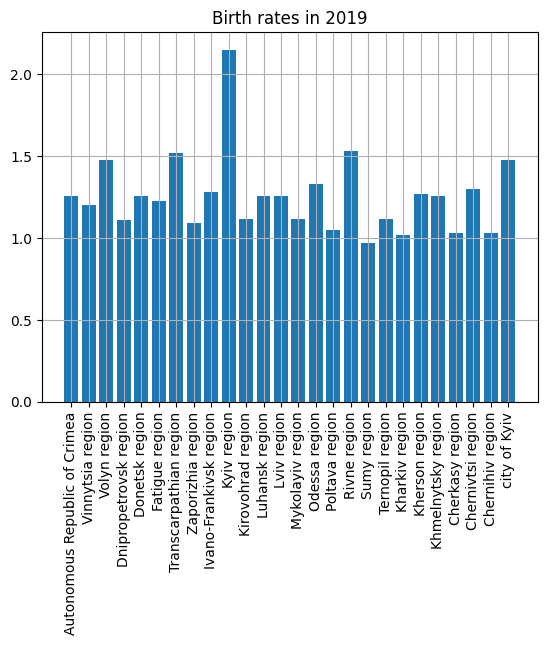

In [28]:
plt.bar(df['regions'], df['2019'])
plt.xticks(rotation=90)
plt.grid(True)
plt.title('Birth rates in 2019')

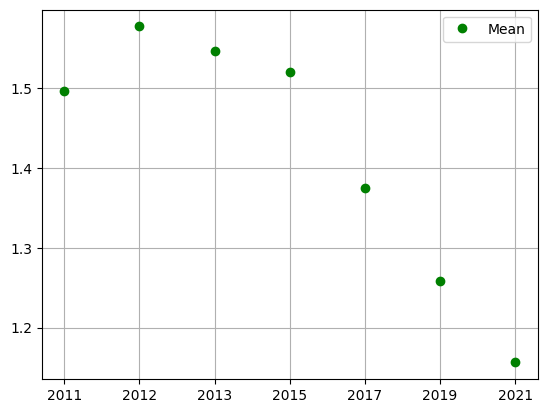

In [29]:
plt.plot(means, "go")
plt.grid(True)
plt.legend(['Mean'])

In [73]:
borders = [9, 17]


Text(0.5, 1.0, 'Ferlity rate of choosen regions')

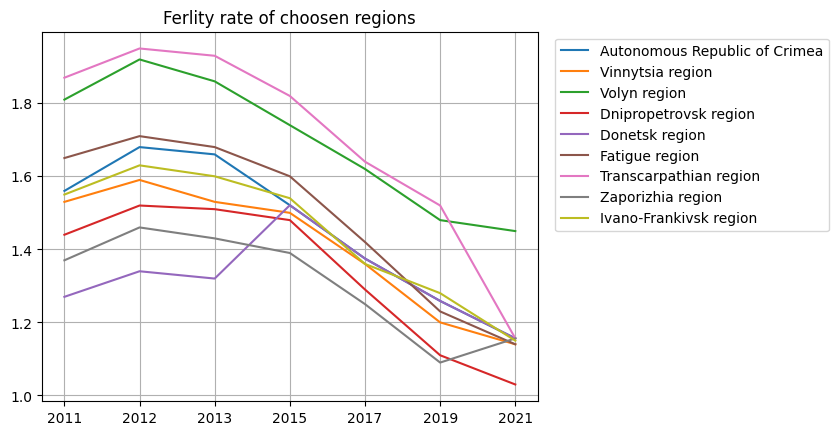

In [74]:
legend = []
for region in df['regions'][0:borders[0]]:
    # print(region)
    # print(df.columns[1:])
    # print(df[df['regions'] == region][df.columns[1:]].to_numpy()[0])

    plt.plot(df.columns[1:], df[df['regions'] == region][df.columns[1:]].to_numpy()[0])
    legend.append(region)

plt.grid(True)
plt.legend(legend, loc='upper right', bbox_to_anchor=(1.6, 1.0))
plt.title('Ferlity rate of choosen regions')

Text(0.5, 1.0, 'Ferlity rate of choosen regions')

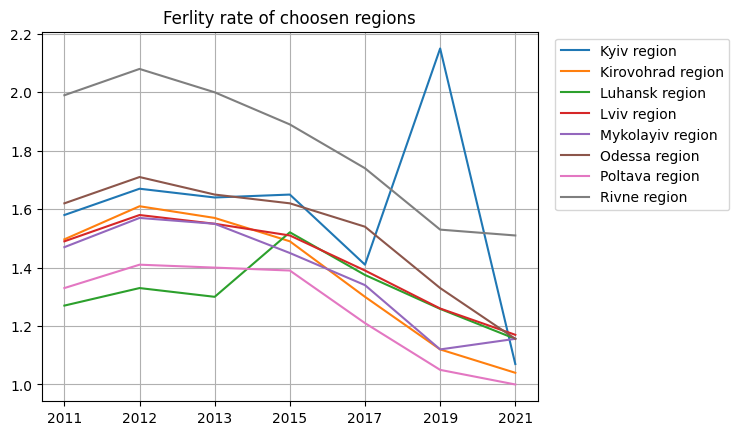

In [76]:
legend = []
for region in df['regions'][borders[0]:borders[1]]:
    # print(region)
    # print(df.columns[1:])
    # print(df[df['regions'] == region][df.columns[1:]].to_numpy()[0])

    plt.plot(df.columns[1:], df[df['regions'] == region][df.columns[1:]].to_numpy()[0])
    legend.append(region)

plt.grid(True)
plt.legend(legend, loc='upper right', bbox_to_anchor=(1.4, 1.0))
plt.title('Ferlity rate of choosen regions')

Text(0.5, 1.0, 'Ferlity rate of choosen regions')

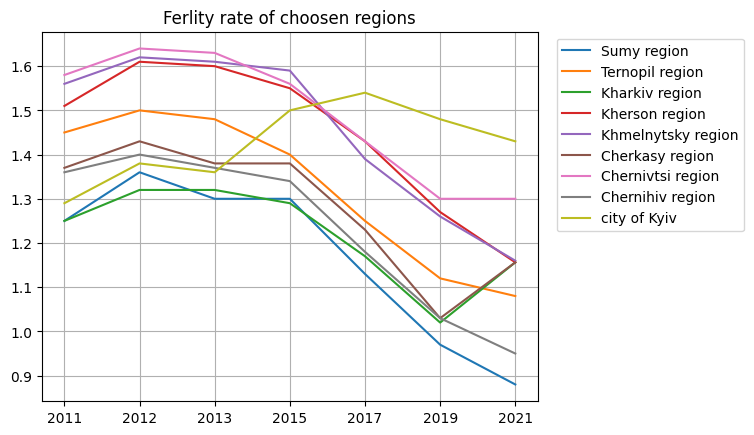

In [81]:
legend = []
for region in df['regions'][borders[1]:]:
    # print(region)
    # print(df.columns[1:])
    # print(df[df['regions'] == region][df.columns[1:]].to_numpy()[0])

    plt.plot(df.columns[1:], df[df['regions'] == region][df.columns[1:]].to_numpy()[0])
    legend.append(region)

plt.grid(True)
plt.legend(legend, loc='upper right', bbox_to_anchor=(1.43, 1.0))
plt.title('Ferlity rate of choosen regions')

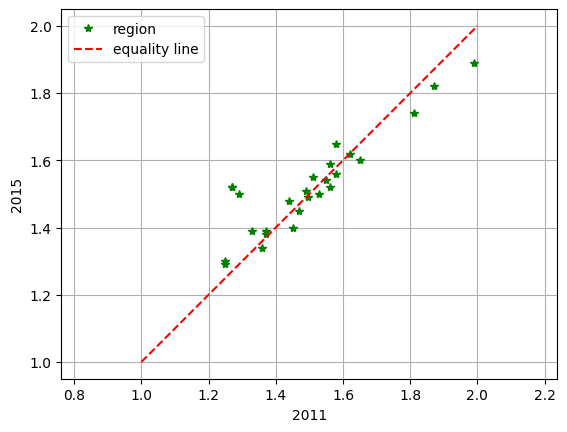

In [97]:
years = ['2011', '2015']

plt.plot(df[years[0]], df[years[1]], 'g*')
plt.plot([1,2],[1,2],"r--")
plt.xlabel(years[0])
plt.ylabel(years[1])
plt.grid(True)
plt.axis('equal')
plt.legend(['region', 'equality line'])
